## Transformada de Hough

In [7]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


#### Transformada de Hough - Líneas

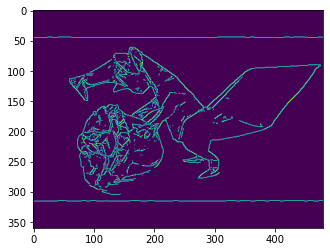

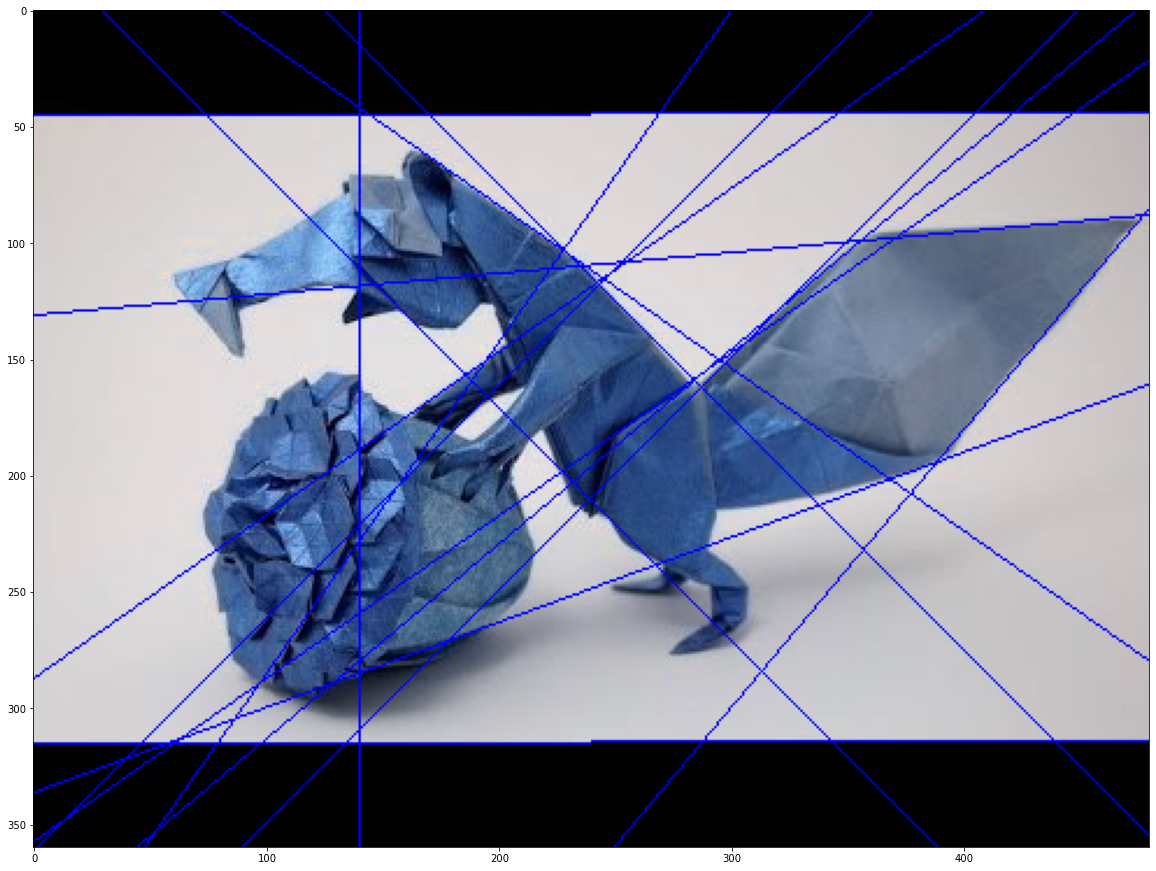

In [6]:
# Leemos la imagen
#=================
img = cv.imread('origami.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(gray,150,160,apertureSize = 3)
#plt.figure(figsize=(20,20))
plt.imshow(edges)
plt.show()

# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180)*5
thresh = 65
lines = cv.HoughLines(edges,rho_step,theta_step,thresh)

# Dibujamos lo resultados
#========================
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),1)

cv.imwrite('houghlines3.jpg',img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

#### Transformada de Hough - Círculos

In [8]:
# Leemos la imagen
#=================
img = cv.imread('tapitas.jpg')
#img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)

cv.imshow('tapitas',gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=15,param1=120,param2=40,minRadius=30,maxRadius=60)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',img_out)
cv.waitKey(0)
cv.destroyAllWindows()